In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [388]:
n225 = pd.read_csv("/content/drive/MyDrive/comsumer_temperature/datasets/^N225_daily_data.csv", index_col=0)

In [389]:
temprature = pd.read_csv("/content/drive/MyDrive/comsumer_temperature/datasets/temprature_3.csv", index_col=0)
temprature.head()

,年月日,平均気温(℃),POSIX,year,month,day,dayofweek,1dayago,2dayago,3dayago,...,5dayago,6dayago,7dayago,8dayago,9dayago,10dayago,11dayago,12dayago,13dayago,14dayago
14,2003-01-15,1.8,1042588800,2003,1,15,2,4.9,4.0,3.6,...,4.0,0.7,0.6,-0.3,0.8,2.3,4.0,-0.8,1.6,2.9
15,2003-01-16,-1.3,1042675200,2003,1,16,3,1.8,4.9,4.0,...,3.9,4.0,0.7,0.6,-0.3,0.8,2.3,4.0,-0.8,1.6
16,2003-01-17,2.7,1042761600,2003,1,17,4,-1.3,1.8,4.9,...,3.6,3.9,4.0,0.7,0.6,-0.3,0.8,2.3,4.0,-0.8
17,2003-01-18,3.7,1042848000,2003,1,18,5,2.7,-1.3,1.8,...,4.0,3.6,3.9,4.0,0.7,0.6,-0.3,0.8,2.3,4.0
18,2003-01-19,2.5,1042934400,2003,1,19,6,3.7,2.7,-1.3,...,4.9,4.0,3.6,3.9,4.0,0.7,0.6,-0.3,0.8,2.3


In [390]:
temprature=  temprature.rename(
    {"年月日": "Date"},
    axis=1
)

In [391]:
df_merge = pd.merge(temprature, n225, on="Date")
df_merge.head()

,Date,平均気温(℃),POSIX,year,month,day,dayofweek,1dayago,2dayago,3dayago,...,11dayago,12dayago,13dayago,14dayago,Open,High,Low,Close,Adj Close,Volume
0,2003-01-15,1.8,1042588800,2003,1,15,2,4.9,4.0,3.6,...,4.0,-0.8,1.6,2.9,8564.169922,8612.129883,8475.040039,8611.750000,8611.750000,59800000
1,2003-01-16,-1.3,1042675200,2003,1,16,3,1.8,4.9,4.0,...,2.3,4.0,-0.8,1.6,8572.660156,8619.839844,8536.110352,8609.169922,8609.169922,59100000
2,2003-01-17,2.7,1042761600,2003,1,17,4,-1.3,1.8,4.9,...,0.8,2.3,4.0,-0.8,8566.809570,8732.849609,8562.129883,8690.250000,8690.250000,64900000
3,2003-01-20,4.2,1043020800,2003,1,20,0,2.5,3.7,2.7,...,0.7,0.6,-0.3,0.8,8639.040039,8657.790039,8495.000000,8558.820312,8558.820312,64600000
4,2003-01-21,3.4,1043107200,2003,1,21,1,4.2,2.5,3.7,...,4.0,0.7,0.6,-0.3,8562.110352,8755.349609,8528.809570,8708.580078,8708.580078,64200000


In [392]:
df_merge.columns

Index(['Date', '平均気温(℃)', 'POSIX', 'year', 'month', 'day', 'dayofweek',
       '1dayago', '2dayago', '3dayago', '4dayago', '5dayago', '6dayago',
       '7dayago', '8dayago', '9dayago', '10dayago', '11dayago', '12dayago',
       '13dayago', '14dayago', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [393]:

X = df_merge[['平均気温(℃)', 'POSIX',
       '1dayago', '2dayago', '3dayago', 'Open']].values
y = df_merge["Adj Close"].values

In [394]:
N = len(df_merge["Date"])
N_train = round(N * .8)

In [395]:
X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

In [396]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                           random_state=0)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [397]:
feature_importances = rf.feature_importances_

In [398]:
df_feature = pd.DataFrame(feature_importances,
                          index=['平均気温(℃)', 'POSIX',
       '1dayago', '2dayago', '3dayago', 'Open']
                          )

In [399]:
df_feature

,0
平均気温(℃),0.000131
POSIX,0.000206
1dayago,0.000109
2dayago,0.000114
3dayago,0.000128
Open,0.999311


In [400]:
df_feature.sort_values(by=0, ascending=False)

,0
Open,0.999311
POSIX,0.000206
平均気温(℃),0.000131
3dayago,0.000128
2dayago,0.000114
1dayago,0.000109


In [401]:
y_pred = rf.predict(X_test)

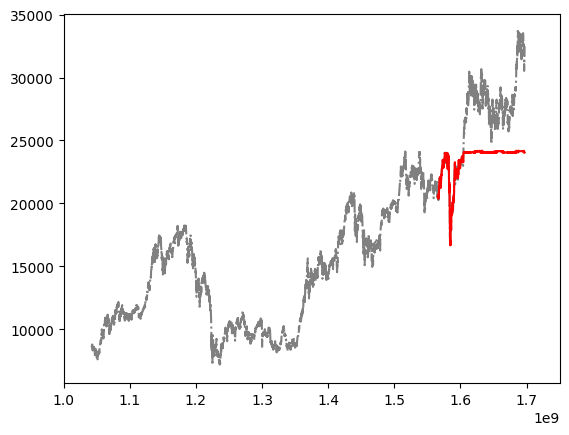

In [402]:
plt.plot(X, y, color="gray", linestyle="dashdot")
plt.xlim([1e9, 1.75e9])
plt.plot(X_test, y_pred, color="red")
plt.show()